### Nama: Gabriella Caesaria Vianney
### NIM: 2209106007
### Kelas: Praktikum KB A1 2022

## POSTTEST 7

### Unzip File Zip dataset

In [2]:
!unzip 'archive_4.zip'

Archive:  archive_4.zip
replace caltech101_classification/butterfly/image_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Split Data

In [3]:
!pip install split-folders

In [4]:
import splitfolders

In [5]:
splitfolders.ratio('caltech101_classification',
                   output='dataset_final',
                   seed=1337,
                   ratio=(.8, .1, .1))

Copying files: 223 files [00:00, 8563.17 files/s]


### Image Data Generator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    brightness_range=[0.8, 1.1],
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1/255
)

### Split Data menjadi Train, Val dan Test

In [8]:
train_generator = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 177 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


### Model Sequential

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_generator, epochs=15,
                    validation_data=val_generator,
                    verbose=1)

Epoch 1/15
6/6 [==============================] - 12s 352ms/step - loss: 1.4437 - accuracy: 0.4011 - val_loss: 0.9881 - val_accuracy: 0.5238
Epoch 2/15
6/6 [==============================] - 1s 218ms/step - loss: 0.9631 - accuracy: 0.5537 - val_loss: 0.8230 - val_accuracy: 0.5714
Epoch 3/15
6/6 [==============================] - 2s 269ms/step - loss: 0.8155 - accuracy: 0.5819 - val_loss: 0.8271 - val_accuracy: 0.5714
Epoch 4/15
6/6 [==============================] - 1s 206ms/step - loss: 0.7678 - accuracy: 0.6667 - val_loss: 0.7290 - val_accuracy: 0.6667
Epoch 5/15
6/6 [==============================] - 1s 206ms/step - loss: 0.6574 - accuracy: 0.7006 - val_loss: 0.6641 - val_accuracy: 0.5714
Epoch 6/15
6/6 [==============================] - 1s 225ms/step - loss: 0.6335 - accuracy: 0.6949 - val_loss: 0.5882 - val_accuracy: 0.8571
Epoch 7/15
6/6 [==============================] - 2s 383ms/step - loss: 0.5791 - accuracy: 0.7514 - val_loss: 0.6158 - val_accuracy: 0.7619
Epoch 8/15
6/6 [===

In [12]:
test_datagen = ImageDataGenerator(
    rescale=1/255.0
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 25 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


### Model Evaluate

In [13]:
model.evaluate(test_generator)

1/1 [==============================] - 0s 273ms/step - loss: 0.4018 - accuracy: 0.8400


[0.40181347727775574, 0.8399999737739563]

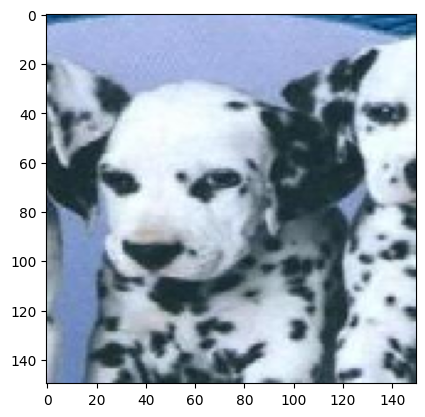

1/1 [==============================] - 0s 19ms/step
classes [[0. 1. 0.]]
Dalmatian


In [16]:
import numpy as np
import tensorflow.keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = '/content/dataset_final/test/dalmatian/image_0041.jpg'
img = image.load_img(path, target_size=(150, 150))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print('classes', classes)
if classes[0,0]:
  print('Butterfly')
elif classes[0,1]:
  print('Dalmatian')
elif classes[0,2]:
  print('Dolphin')

### Grafik pergerakan metrik (akurasi/error) dan loss terhadap epoch dari training dan validation

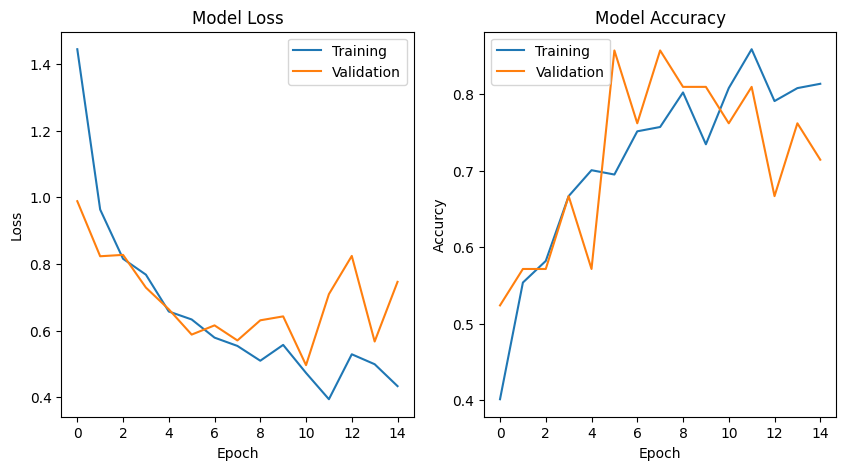

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accurcy')
plt.legend(['Training', 'Validation'])
plt.show()